### **BCG Virtual Internship**
#### Task 3: Feature Engineering & Modeling
#### author: @cipher499
#### 15/08/23

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [2]:
# load the data
df = pd.read_csv('Merged_eda.csv')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14605 non-null  object 
 1   channel_sales                   14605 non-null  object 
 2   cons_12m                        14605 non-null  int64  
 3   cons_gas_12m                    14605 non-null  int64  
 4   cons_last_month                 14605 non-null  int64  
 5   date_activ                      14605 non-null  object 
 6   date_end                        14605 non-null  object 
 7   date_modif_prod                 14605 non-null  object 
 8   date_renewal                    14605 non-null  object 
 9   forecast_cons_12m               14605 non-null  float64
 10  forecast_cons_year              14605 non-null  int64  
 11  forecast_discount_energy        14605 non-null  int64  
 12  forecast_meter_rent_12m         

#### *Convert the date columns into datetime format*

In [6]:
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

In [7]:
# do the same for the date column in price df
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
price_df.shape

(193002, 8)

In [9]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# jan & dec
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

In [10]:
jan_prices

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0004351ebdd665e6ee664792efc4fd13,2015-01-01,0.148047,44.266931
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-01-01,0.150837,44.444710
3,0010ee3855fdea87602a5b7aba8e42de,2015-01-01,0.123086,40.565969
4,00114d74e963e47177db89bc70108537,2015-01-01,0.149434,44.266931
...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,2015-01-01,0.162720,41.063970
16092,fffac626da707b1b5ab11e8431a4d0a2,2015-01-01,0.148825,44.266931
16093,fffc0cacd305dd51f316424bbb08d1bd,2015-01-01,0.153159,41.063970
16094,fffe4f5646aa39c7f97f95ae2679ce64,2015-01-01,0.127566,40.565969


In [11]:
dec_prices

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930
...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,2015-12-01,0.112488,40.728885
16092,fffac626da707b1b5ab11e8431a4d0a2,2015-12-01,0.145047,44.444710
16093,fffc0cacd305dd51f316424bbb08d1bd,2015-12-01,0.151399,41.228885
16094,fffe4f5646aa39c7f97f95ae2679ce64,2015-12-01,0.118175,40.728885


In [12]:
# merge the jan and dec off peak dataframes
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')

# create new columns for differences 
diff['offpeak_diff_dec_jan_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_jan_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_jan_energy','offpeak_diff_dec_jan_power']]
diff.head()

,id,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [13]:
# merge this dataframe with df on the column id
df = pd.merge(df, diff, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916


#### Average price changes across periods
We'll now calculate the average price changes across individual periods (off-peak, mid-peak, peak), instead of the entire year. This will give us more feature granularity.

In [14]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
        'price_off_peak_var': 'mean', 
        'price_peak_var': 'mean', 
        'price_mid_peak_var': 'mean',
        'price_off_peak_fix': 'mean',
        'price_peak_fix': 'mean',
        'price_mid_peak_fix': 'mean'
        }).reset_index()

In [15]:
# Calculate the mean differnce between consecutive periods
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['mid_peak_peak_var_mean_diff'] = mean_prices['price_mid_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_off_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_off_peak_var']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_var']
mean_prices['mid_peak_peak_fix_mean_diff'] = mean_prices['price_mid_peak_fix'] - mean_prices['price_peak_var']
mean_prices['peak_off_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_off_peak_var']

In [16]:
columns = [
    'id', 
    'off_peak_mid_peak_var_mean_diff',
    'mid_peak_peak_var_mean_diff', 
    'peak_off_peak_var_mean_diff',
    'off_peak_mid_peak_fix_mean_diff', 
    'mid_peak_peak_fix_mean_diff', 
    'peak_off_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p3,churn,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power,off_peak_mid_peak_var_mean_diff,mid_peak_peak_var_mean_diff,peak_off_peak_var_mean_diff,off_peak_mid_peak_fix_mean_diff,mid_peak_peak_fix_mean_diff,peak_off_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,8.182687,1,0.020057,3.700961,0.058257,-0.034219,-0.024038,40.875735,14.800591,22.227223
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0,-0.003767,0.177779,0.149609,-0.007124,-0.142485,44.311375,-0.007124,-0.149609
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0,-0.004670,0.177779,0.170512,-0.088421,-0.082090,44.385450,-0.088421,-0.170512
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0,-0.004547,0.177779,0.151210,0.000000,-0.151210,44.400265,0.000000,-0.151210
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,16.365274,0,-0.006192,0.162916,0.051309,-0.030773,-0.020536,40.615291,16.171625,24.288718


Instead of looking at differences across an entire year, this feature looks at the differences between periods within a year. The dec-jan feature may reveal macro patterns over the course of an year, while this feature may reveal pattern on a micro scale between months.

#### Max price changes across periods and months

In [17]:
# Aggregate average prices per periosd by compnay
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [18]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['mid_peak_peak_var_mean_diff'] = mean_prices_by_month['price_mid_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_off_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_off_peak_var']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['mid_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_mid_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_off_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_off_peak_fix']

In [19]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_mid_peak_var_mean_diff': 'max',
    'mid_peak_peak_var_mean_diff': 'max',
    'peak_off_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max',
    'mid_peak_peak_fix_mean_diff': 'max',
    'peak_off_peak_fix_mean_diff': 'max'
}).reset_index().rename(
columns={
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'mid_peak_peak_var_mean_diff': 'mid_peak_peak_var_max_monthly_diff',
        'peak_off_peak_var_mean_diff': 'peak_off_peak_var_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff',
        'mid_peak_peak_fix_mean_diff': 'mid_peak_peak_fix_max_monthly_diff',
        'peak_off_peak_fix_mean_diff': 'peak_off_peak_fix_max_monthly_diff'
    }
)

In [20]:
columns = [
    'id',
    'off_peak_mid_peak_var_max_monthly_diff',
    'mid_peak_peak_var_max_monthly_diff',
    'peak_off_peak_var_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff',
    'mid_peak_peak_fix_max_monthly_diff',
    'peak_off_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,peak_off_peak_var_mean_diff,off_peak_mid_peak_fix_mean_diff,mid_peak_peak_fix_mean_diff,peak_off_peak_fix_mean_diff,off_peak_mid_peak_var_max_monthly_diff,mid_peak_peak_var_max_monthly_diff,peak_off_peak_var_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,mid_peak_peak_fix_max_monthly_diff,peak_off_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,-0.024038,40.875735,14.800591,22.227223,0.146033,-0.025975,-0.017685,44.26693,0.000000,-16.226389
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,-0.142485,44.311375,-0.007124,-0.149609,0.151367,0.000000,-0.060550,44.44471,0.000000,-44.266930
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,-0.082090,44.385450,-0.088421,-0.170512,0.172468,-0.087881,-0.079389,44.44471,0.000000,-44.266931
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,-0.151210,44.400265,0.000000,-0.151210,0.153133,0.000000,-0.148586,44.44471,0.000000,-44.266931
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,-0.020536,40.615291,16.171625,24.288718,0.055866,-0.027954,-0.018233,24.43733,-8.113192,-16.226389


These features can be crucial for predicting churn as they'll help us look into sudden price changes between months and their effect on churn as a large increase in prices within a short time span would be an influencing factor in causing a customer to pivot to a different utilities provider. 

#### Tenure

In [21]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/np.timedelta64(1, 'Y')).astype(int)

In [22]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.143836
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


It is evident that the clients with age 4 months or less are the most likely to churn. It is also interesting to see the ~4% difference in churn between tenure age 4 montsh & 5 months. This suggests that getting a customer to over 4 months tenure is a milestone with respect to keeping them as a long term customer. 

#### Tranforming dates into months

In [23]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta/np.timedelta64(1, 'M')).astype(int)
    return months

In [24]:
# Create a reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

`months_activ` -> older clients are likely to be more loyal to the provider whereas newwer clients might be more volatile. <br>
`months end` -> clients nearing the end of their contract might decide to renew the contract or change to a different provider. There may be a period where a client is allowed to leave if they're not satisfied. Furthermore, if a client is in the middle of a contract, their may be charges for leaving, deterring clients from churning mid-way through their agreement. This feature could be useful in that regard. <br>
`months_modif_prod` -> If a client has made recent updates to their contract, it could be because of a level of customer service they've received. They are satisfied with the service and want to upgrade their contract. This feature could be interesting in that it will tell us how 'engaged' a client is. <br>
`months_renewal` -> Similarily, if a client is committed enough to renew their contract, it could tell us about how 'engaged' they are. 

In [25]:
remove = [
        'date_activ',
        'date_end',
        'date_modif_prod',
        'date_renewal'
]

df = df.drop(columns=remove)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,mid_peak_peak_var_max_monthly_diff,peak_off_peak_var_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,mid_peak_peak_fix_max_monthly_diff,peak_off_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0,1.78,0.114481,...,-0.025975,-0.017685,44.26693,0.000000,-16.226389,3,30,-5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0,16.27,0.145711,...,0.000000,-0.060550,44.44471,0.000000,-44.266930,7,76,-7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0,38.72,0.165794,...,-0.087881,-0.079389,44.44471,0.000000,-44.266931,6,68,-3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0,19.83,0.146694,...,0.000000,-0.148586,44.44471,0.000000,-44.266931,6,69,-2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0,131.73,0.116900,...,-0.027954,-0.018233,24.43733,-8.113192,-16.226389,6,71,-2,71,9


#### Transforming boolean data

In [26]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100544
1,0.081887


The churn percentage is higher by 2% for the customers who do not buy gas from the customers who do. If a customer also buys gas, it shows that they likely to be loyal to PowerCo.

#### Transforming categorical data

In [27]:
# Transfrom str -> categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

As the total number of rows are an upwards of 14000, we can safely drop the last three categories.

In [28]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])

In [29]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0,1.78,0.114481,0.098142,...,3,30,-5,2,6,0,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0,16.27,0.145711,0.000000,...,7,76,-7,76,4,1,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0,38.72,0.165794,0.087899,...,6,68,-3,68,8,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0,19.83,0.146694,0.000000,...,6,69,-2,69,9,0,0,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0,131.73,0.116900,0.100015,...,6,71,-2,71,9,1,0,0,0,0


In [30]:
# Origin_up column
df['origin_up'] = df['origin_up'].astype('category')
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [31]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0,1.78,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0,16.27,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0,38.72,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0,19.83,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0,131.73,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


#### Transforming numerical data
In the EDA phase, we saw that some of the numerical variables were highly skewed. This could pose a problem in the modeling phase as some models assume that the variables are both independent and normally distributed. Thus, we need to treat the highly skewed variables as it will also help the model the converge faster at the best parameters. <br>
Typically, we can apply the following transformations to treat for skewness: <br>
* Square root 
* Cubic root
* Logarithmic <br>

In this case, we'll use Logarithmic transformation for the positively skewed features. As the log of 0 is not defined, we'll add a constant of 1 to all values.

In [32]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,43.130085
std,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,4.486140
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378
75%,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


The skewness is evident as the standard deviation is is large for most of the variables.

In [33]:
df['cons_12m'] = np.log10(df['cons_12m']+1)
df['cons_gas_12m'] = np.log10(df['cons_gas_12m']+1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [34]:
df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,4.223945,0.778978,2.264801,2.962162,1.784733,0.966450,1.517233,0.137282,0.050488,43.130085
std,0.884545,1.716828,1.769266,0.683612,1.584972,5.108355,0.571489,0.024623,0.049037,4.486140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.753966,0.000000,0.000000,2.695464,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701
50%,4.149742,0.000000,2.899821,3.046733,2.498311,0.000000,1.296665,0.143166,0.084138,44.311378
75%,4.610287,0.000000,3.529430,3.380803,3.242293,0.000000,2.120673,0.146348,0.098837,44.311378
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378


The standard deviation has decreased significantly after applying the log transformation. Let's visualize these variables to see the shapes of distributions.

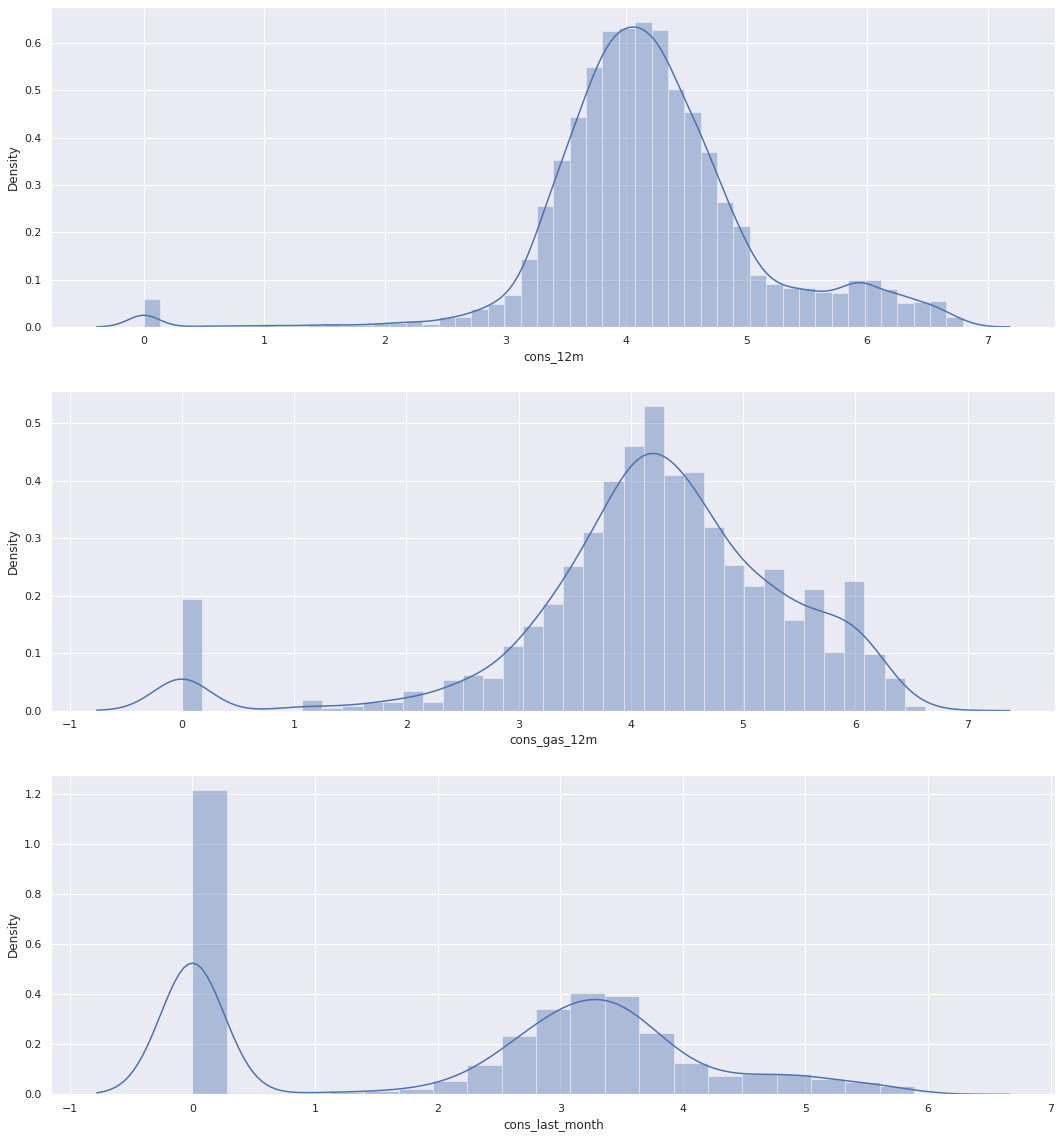

In [35]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

# Plot histograms
sns.distplot((df['cons_12m'].dropna()), ax=axs[0])
sns.distplot((df[df['has_gas']==1]['cons_gas_12m'].dropna()), ax=axs[1])
sns.distplot((df['cons_last_month'].dropna()), ax=axs[2])
plt.show()

In [36]:
df['cons_12m'].value_counts()

0.000000    117
6.459784     27
6.522346     24
6.241304     18
6.792889     18
           ... 
4.044305      1
3.992951      1
3.700531      1
4.618216      1
3.858778      1
Name: cons_12m, Length: 11064, dtype: int64

In [37]:
df['cons_last_month'].value_counts()

0.000000    4982
5.582799      27
5.707423      24
5.746728      18
5.671368      18
            ... 
2.307496       1
4.478350       1
3.856789       1
4.238974       1
4.055684       1
Name: cons_last_month, Length: 4751, dtype: int64

Creating new features and modifying existing ones is a trial and error process. Once we train a predictive model we can see which features work and which features don't, we will also know how predictive the present set of features is. <br>
We can then come back to feature engineering to enhance the model.

#### Correlations
PCC measures the strength of linear relationship between variables. We want features to have strong correlation with churn and weak correlation amongst themselves. Two columns that have a high correlation is a case of collinearity- two features with similar amount of information. One of the assumption of a parametric model is that all features must be independent. 

In [38]:
correlation = df.corr()

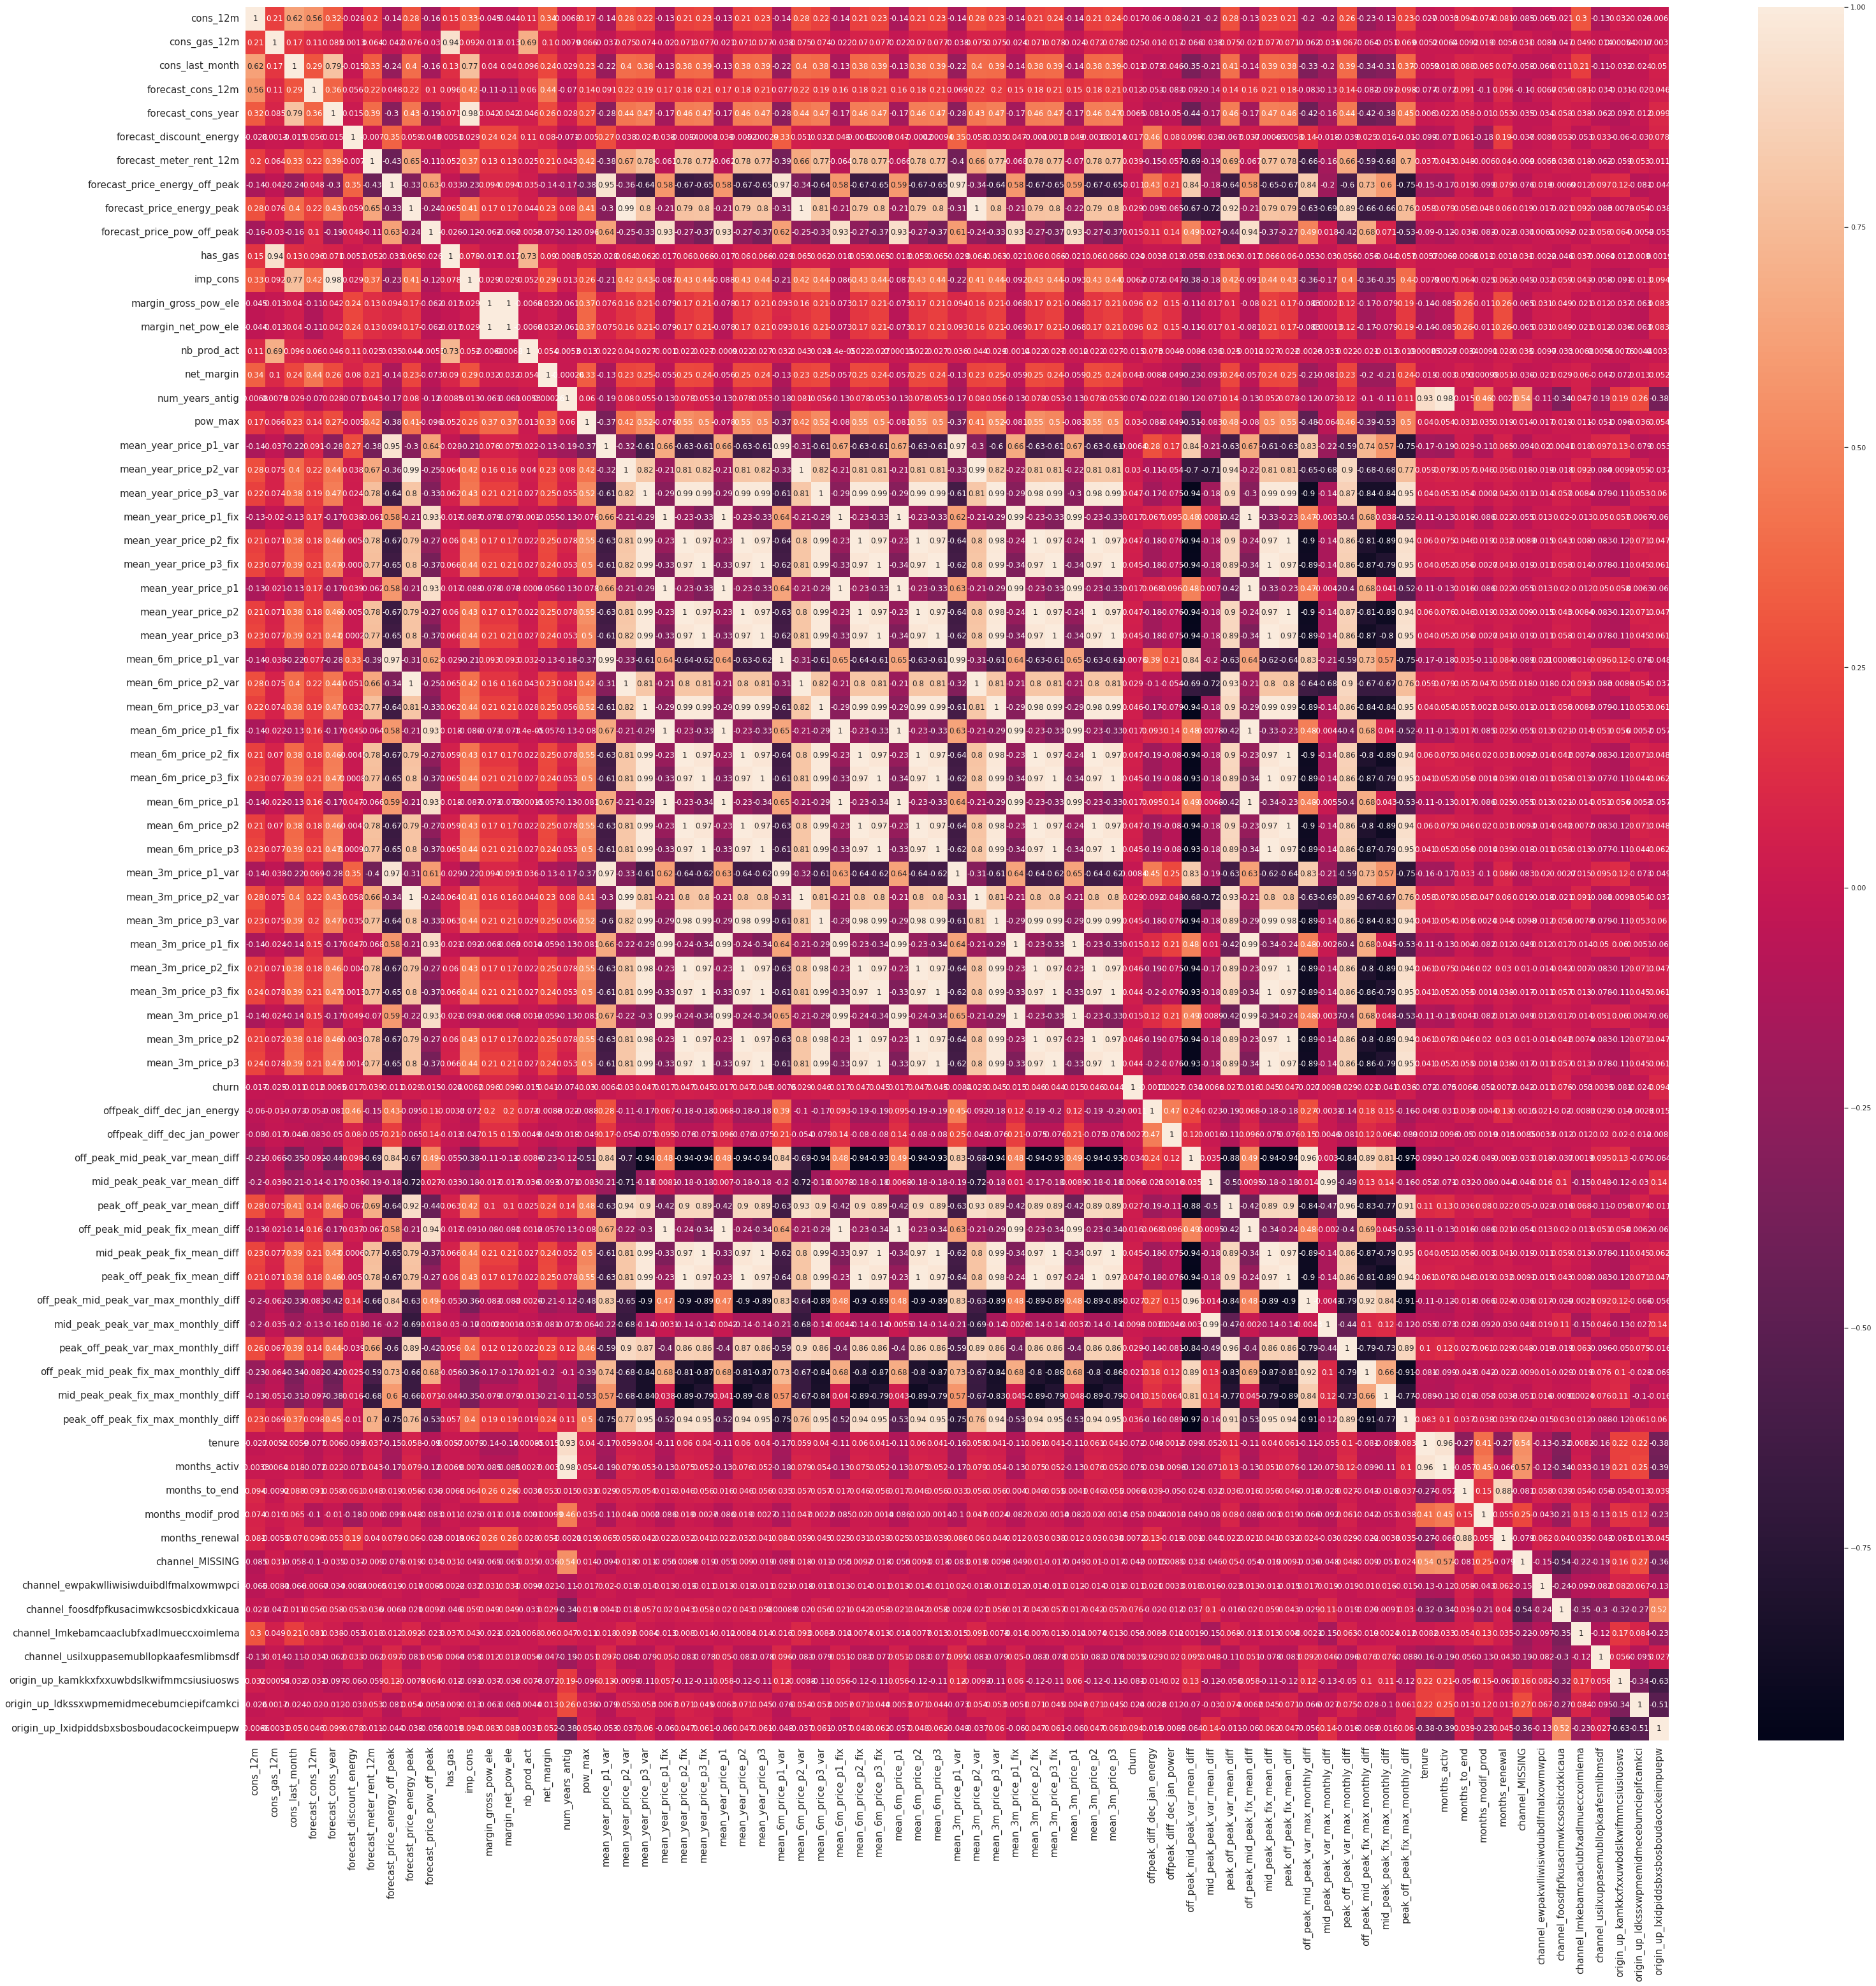

<Figure size 432x288 with 0 Axes>

In [39]:
# plot a heatmap of the correlation matrix
plt.figure(figsize=(50,50))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size':12}
)

# axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
plt.savefig('heatmap.png')

In [40]:
# drop the columns with weak correlation to the target
df.drop(columns=['num_years_antig', 'forecast_cons_year'], inplace=True)
df.shape

(14605, 72)

### Modelling
#### Data sampling

In [41]:
# create a copy of the dataframe for modelling
df_train = df.copy()

# create the target and the features dfs
y = df_train['churn']
X = df_train.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14605, 70)
(14605,)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [43]:
# split the data; reserve 25% for testing; specify a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10953, 70)
(3652, 70)
(10953,)
(3652,)


#### Model building

In [44]:
# Create an instance of the Random Forest model; n_estimators -> number of decision trees in the RandomForest
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# fit the model to the training data; 
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

#### Evaluation
**Accuracy** = the ratio of correctly predicted observations to the total number of observations <br>
**Precision** = the ability of a model to not label a negative observation as positive <br>
    - `How many retrieved items are relevant?` <br>
**Recall** = the ability of a model to predict all the positive outcomes <br>
    - `How many relevant items are retrieved?`

In [45]:
# apply the model to the test data
y_hat = rf.predict(X_test)

# extract elements of the confusion matrix
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_hat).ravel()

In [46]:
y_test.value_counts()

0    3279
1     373
Name: churn, dtype: int64

In [47]:
y_hat_df = pd.DataFrame(y_hat)
y_hat_df.value_counts()

0    3629
1      23
dtype: int64

In [48]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, y_hat)}")
print(f"Precision: {metrics.precision_score(y_test, y_hat)}")
print(f"Recall: {metrics.recall_score(y_test, y_hat)}")

True positives: 21
False positives: 2
True negatives: 3277
False negatives: 352

Accuracy: 0.9030668127053669
Precision: 0.9130434782608695
Recall: 0.05630026809651475


* The accuracy score is quite high at 90%. It indicates that the model was able to make a large number of correct predictions. However, this metric by itself can be misleading as it doesn't tell us anything about the model's ability to correctly predict churners.
* The precision is around 91% which means that the model was able to correctly predict a high number of customers who churned. This is great.
* Interestingly, the recall score is quite low at 56% which means that the model is remarkably poor at identifying positive samples or churners.
* The number of false negatives is high at 352. The model predicted a huge number of clients to not churn (churn=0) when in fact they did churn(churn=1). We want this number to be as low as possible. 

In [49]:
feature_importances = pd.DataFrame({
                        'feature': X_train.columns, 
                        'importance': rf.feature_importances_
                        }).sort_values(by='importance', ascending=True).reset_index()

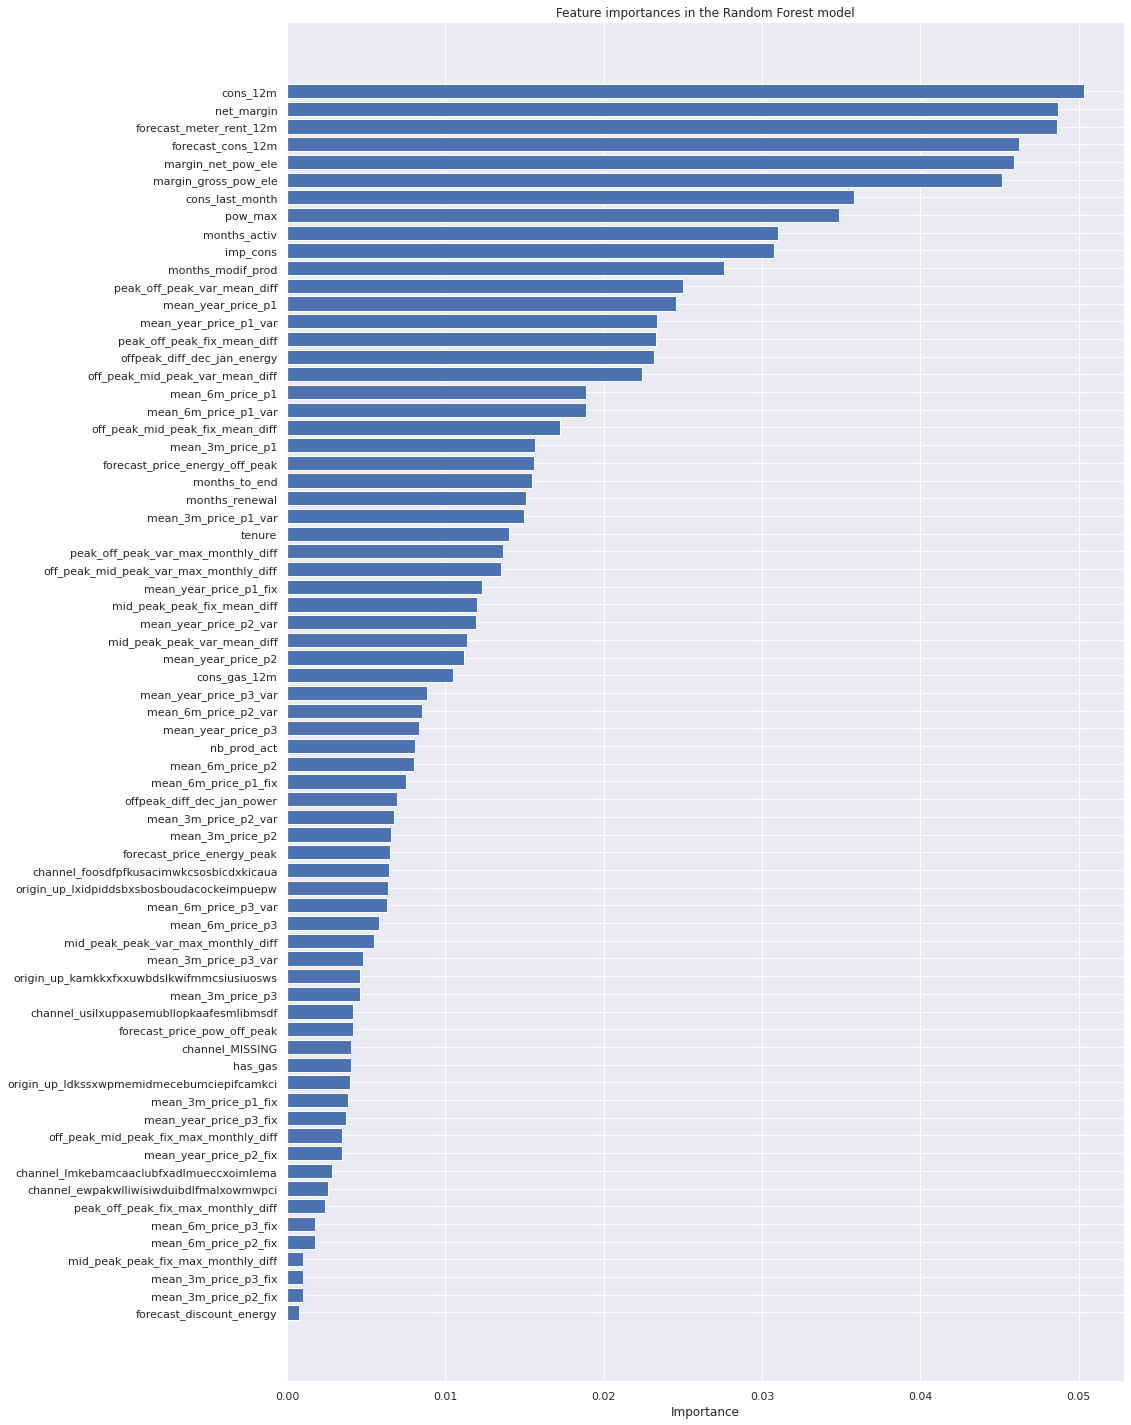

In [50]:
plt.figure(figsize=(15,25))
plt.title('Feature importances in the Random Forest model')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['feature'])
plt.xlabel('Importance')
plt.show()

---

For improving the model we can try doing the following: <br>
1. Revisit feature engineering and try to create more interesting features.
2. Optimise the model by tuning the hyperparamters.

Instead of doing a grid search rightaway, we can try a randomized search first to get the ballpark in terms of the best hyperparameters and then do a more granular grid search. <br>
We can use more models such as SVC, KNN, LR. <br>
For feature engineering, we could first use PCA to handle dimensionality. <br>
After comparing models, if still the recall score is low, we can go back and get rid of some features to make the model simpler. 

In [36]:
from sklearn.model_selection import GridSearchCV

In [47]:
"""
param_grid = { 
    'n_estimators': [100, 200, 300, 500, 750, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf2 = RandomForestClassifier(random_state=32)
rf_gs = GridSearchCV(rf2, param_grid=param_grid, cv=8)
rf_gs.fit(X_train, y_train)
y_hat_gs = rf_gs.predict(X_test)
tn_gs, fp_gs, fn_gs, tp_gs = metrics.confusion_matrix(y_test, y_hat_gs).ravel()

print(f"True positives: {tp_gs}")
print(f"False positives: {fp_gs}")
print(f"True negatives: {tn_gs}")
print(f"False negatives: {fn_gs}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, y_hat_gs)}")
print(f"Precision: {metrics.precision_score(y_test, y_hat_gs)}")
print(f"Recall: {metrics.recall_score(y_test, y_hat_gs)}")
"""

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [46]:
lr = LogisticRegression(max_iter=2000)
knn = KNeighborsClassifier()
svc = SVC(probability=True)

In [47]:
lr.fit(X_train, y_train)
y_hat_lr = lr.predict(X_test)
recall_lr = metrics.recall_score(y_test, y_hat_lr).ravel()
print(recall_lr)

[0.0080429]


In [49]:
print(metrics.accuracy_score(y_test, y_hat_lr).ravel())
print(metrics.precision_score(y_test, y_hat_lr).ravel())

[0.89594743]
[0.23076923]


In [50]:
knn.fit(X_train, y_train)
y_hat_knn = knn.predict(X_test)

print(metrics.recall_score(y_test, y_hat_knn).ravel())
print(metrics.accuracy_score(y_test, y_hat_knn).ravel())
print(metrics.precision_score(y_test, y_hat_knn).ravel())

[0.02949062]
[0.8932092]
[0.28205128]


In [51]:
svc.fit(X_train, y_train)
y_hat_svc = svc.predict(X_test)

print(metrics.recall_score(y_test, y_hat_svc).ravel())
print(metrics.accuracy_score(y_test, y_hat_svc).ravel())
print(metrics.precision_score(y_test, y_hat_svc).ravel())

[0.]
[0.89786418]
[0.]


the recall score for all three models alongwith the precision is exceptionally low. 

In [38]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
               'penalty': ['l1', 'l2'],
                'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring='recall')
best_clf_lr = clf_lr.fit(X_train, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


NameError: name 'clf_performance' is not defined